In [1]:
import pandas as pd
from insight_utils import bar_groups_chart, box_plot
from constants import FORMAT_MODIFIERS, LENGTH_MODIFIERS, DENSENESS_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
results_path = "results/gpt-3.5-turbo-16k/"
base_prompt_df = pd.read_csv(results_path + "base_prompt.csv")
length_df = pd.read_csv(modifiers_path + "length.csv")

#### Format

In [2]:
length_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rogue_1,...,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency,config
0,brief,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Concentration of AI in Big Tech Companies\...,stop,[],[],...,0.000000,0,1,2,9,2.95,4.65,4.25,4.15,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
1,brief,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Concentration of AI in Big Tech Companies\...,stop,[],[],...,0.083333,0,1,1,9,3.00,4.50,4.50,4.20,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
2,short,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.000000,0,1,3,9,3.00,4.40,4.20,4.25,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
3,short,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.000000,0,1,3,9,3.00,4.40,4.25,4.15,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
4,shortened,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,Rise of AI and its concentration in big tech c...,stop,[],[],...,0.000000,0,1,3,9,2.75,4.85,4.35,4.20,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [3]:
for m in LENGTH_MODIFIERS:
    print(m)

brief
short
shortened
abbreviated
abridged
curtailed
less than 60 characters long
shortened as possible


In [4]:
length_df.describe()

,num_examples,title,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency
count,361.0,0.0,361.0,361.000000,361.000000,361.000000,361.000000,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.0,NaN,0.0,0.994740,0.620499,0.047553,0.012235,0.0,0.864266,1.257618,7.357341,1.928504,2.936427,2.973463,2.803740
std,0.0,NaN,0.0,0.012085,1.205322,0.091123,0.037582,0.0,0.342981,1.114353,2.496054,1.365699,2.080273,2.104782,1.983773
min,0.0,NaN,0.0,0.934193,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,NaN,0.0,0.994792,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,NaN,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,9.000000,2.850000,4.250000,4.350000,4.100000
75%,0.0,NaN,0.0,1.000000,1.000000,0.083333,0.000000,0.0,1.000000,2.000000,9.000000,2.950000,4.450000,4.500000,4.250000
max,0.0,NaN,0.0,1.000000,6.000000,0.583333,0.333333,0.0,1.000000,3.000000,9.000000,3.000000,4.850000,4.850000,4.550000


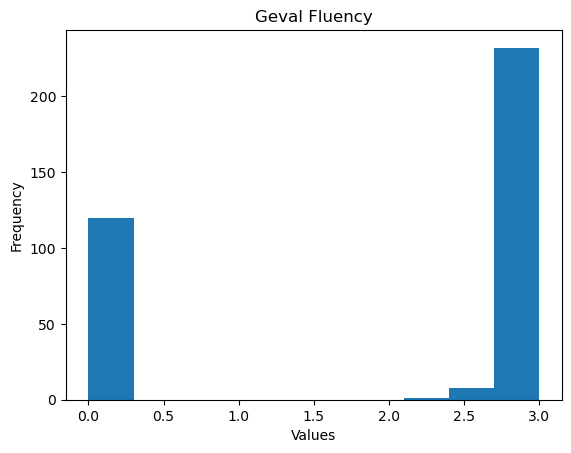

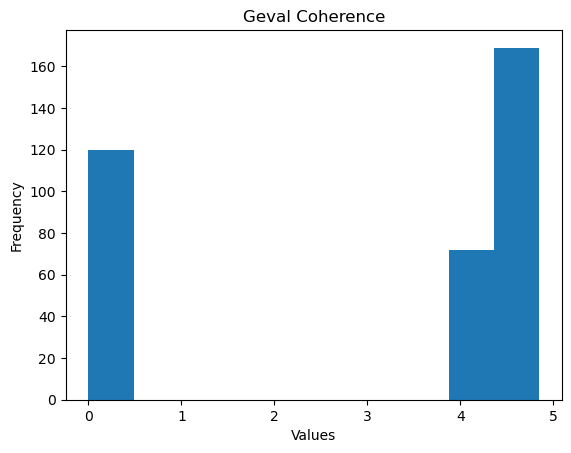

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(length_df["geval_fluency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Fluency")
plt.show()

plt.hist(length_df["geval_coherence"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Coherence")
plt.show()

#### Split results by modifier into separate dataframes

In [6]:
dataframes = [base_prompt_df]

for modifier in LENGTH_MODIFIERS:
    modifier_df = length_df[length_df["prompt_template"] == modifier]
    dataframes.append(modifier_df)

print("####### 30 tries per modifier #######\n")



####### 30 tries per modifier #######



#### To evaluate: entailment, errors, geval_fluency, geval_coherence

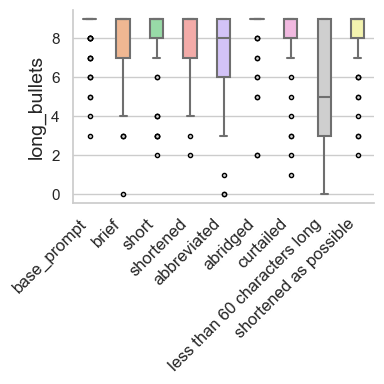

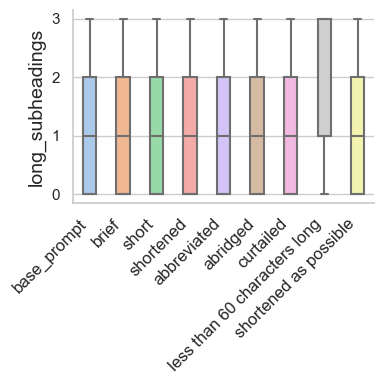

In [7]:
evaluate = [
        "long_bullets",
        "long_subheadings",
        # "contradiction_ratio",
        # "errors",
        # "geval_fluency",
        # "geval_relevance",
        # "geval_coherence",
        # "geval_consistency",
    ]

for eval in evaluate:
    box_plot(dataframes, ["base_prompt"] + LENGTH_MODIFIERS, eval, width=4, height=4, outlier_size=3)


# dic = {}

# for i, df in enumerate(dataframes):
    # success_rate = (df["three_by_three"].sum() / 30) * 100
    # modifier = QUALITY_MODIFIERS[i]
    # dic.update({modifier: round(success_rate)})

# sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
# result_df = pd.DataFrame(sorted_dic.items(),columns=["Modifier", "Success Rate"])

# print(result_df.style.to_latex())